In [2]:
!pip install qiskit qiskit-ibmq-provider pylatexenc qiskit-aer

In [72]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_bloch_vector, array_to_latex
import numpy as np
from numpy import linalg

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


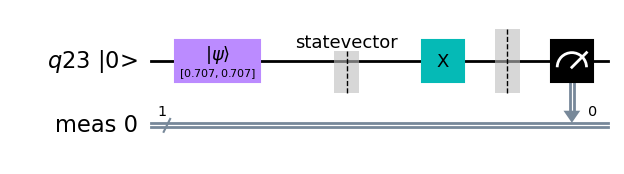

In [196]:
qr = QuantumRegister(1)
qc = QuantumCircuit(qr)
initial_state = [1/np.sqrt(2), 1/np.sqrt(2)]
# initial_state = initial_state/linalg.norm(initial_state)
qc.initialize(initial_state, 0)
qc.save_statevector()
qc.x(0)
qc.measure_all()

qc.draw(output='mpl', initial_state=True)

In [197]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc).result()
state = result.get_statevector()
counts = result.get_counts()


In [198]:
print(state)
print(linalg.norm(state))
print(abs(state[0]))
print(abs(state[1]))

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
0.9999999999999999
0.7071067811865475
0.7071067811865475


{'0': 513, '1': 511}


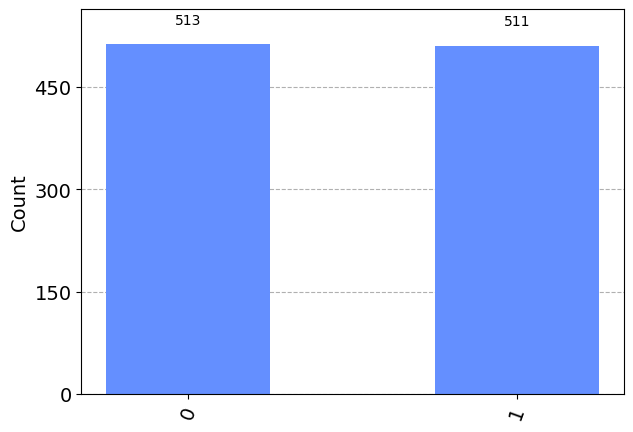

In [199]:
print(counts)
plot_histogram(counts)

Сфера Блоха

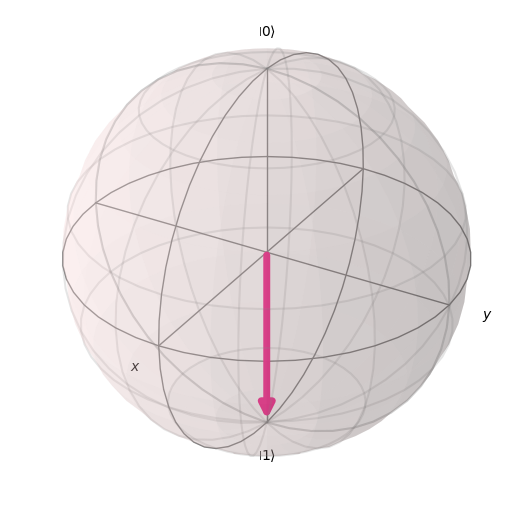

In [52]:
coords = [1, np.pi, 0] # [radius, theta, phi]
plot_bloch_vector(coords, coord_type='spherical')

Гейты

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


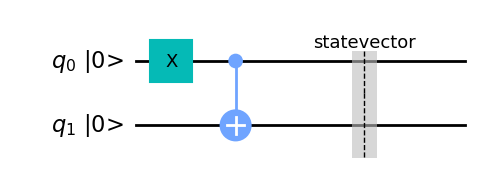

In [200]:
sim = Aer.get_backend('aer_simulator')
qc = QuantumCircuit(2)
qc.x(0)
qc.cx(0,1)
qc.save_statevector()
# qc.save_unitary()
qc.draw(output='mpl', initial_state=True)

In [201]:
result = sim.run(qc).result()

In [202]:
psi = result.get_statevector()
# psi = result.get_unitary()
array_to_latex(psi)

<IPython.core.display.Latex object>

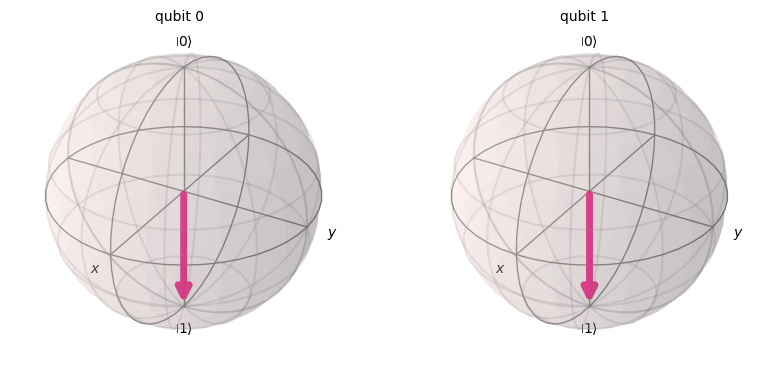

In [203]:
plot_bloch_multivector(psi)

Полусумматор

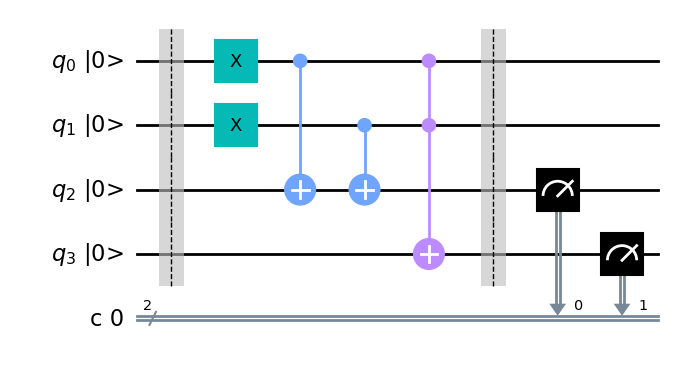

In [204]:
qc_sum = QuantumCircuit(4,2)
qc_sum.barrier()

qc_sum.x(0)
qc_sum.x(1)

qc_sum.cx(0, 2)
qc_sum.cx(1, 2)
qc_sum.ccx(0,1,3) # гейт тафоли

qc_sum.barrier()
qc_sum.measure(2,0)
qc_sum.measure(3,1)
qc_sum.draw(output='mpl', initial_state=True)

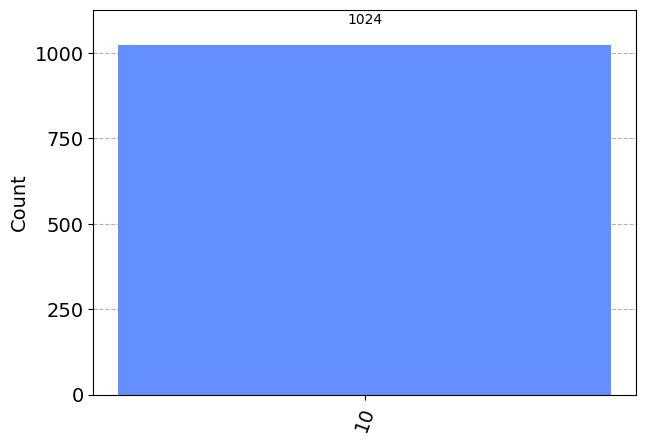

In [121]:
counts = sim.run(qc_sum).result().get_counts()
plot_histogram(counts)

Полный сумматор

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


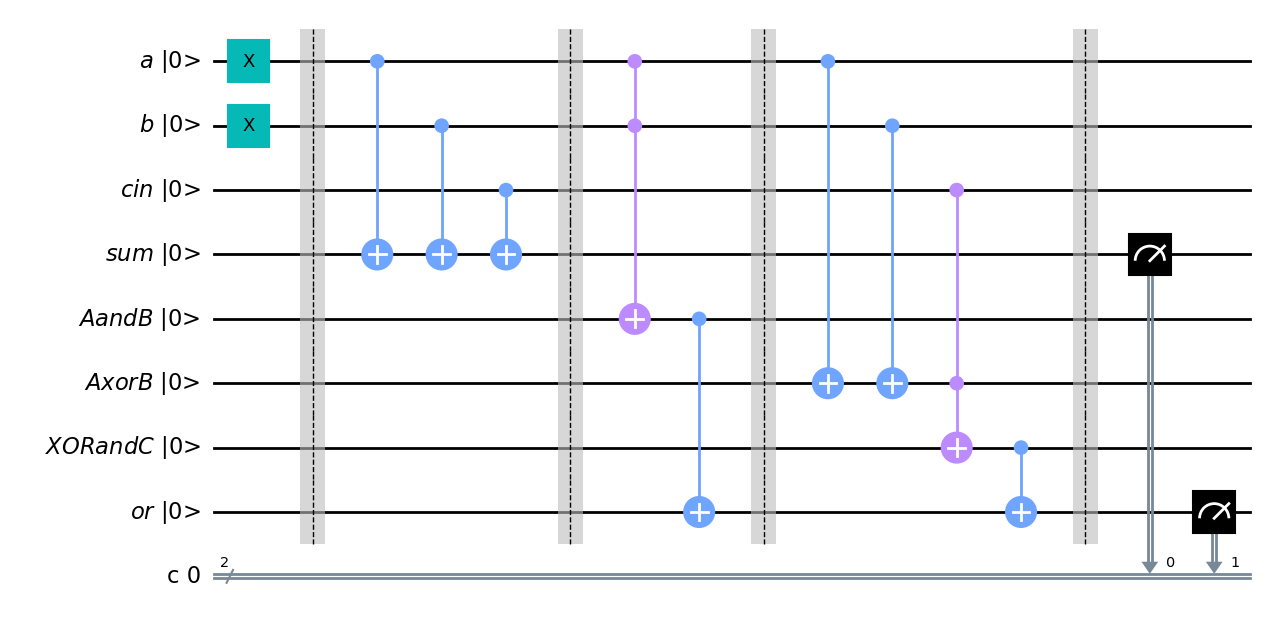

In [207]:
q_a = QuantumRegister(1, 'a')
q_b = QuantumRegister(1, 'b')
q_cin = QuantumRegister(1, 'cin')

q_sum = QuantumRegister(1, 'sum')
q_AandB = QuantumRegister(1, 'AandB')
q_AxorB = QuantumRegister(1, 'AxorB')
q_XORandC = QuantumRegister(1, 'XORandC')
q_or = QuantumRegister(1, 'or')

c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(q_a, q_b, q_cin, q_sum, q_AandB, q_AxorB, q_XORandC, q_or, c)


# Входные данные
qc.x(q_a[0])
qc.x(q_b[0])
# qc.x(q_cin[0])

qc.barrier()




# СУММА
qc.cx(q_a[0], q_sum[0])
qc.cx(q_b[0], q_sum[0])
qc.cx(q_cin[0], q_sum[0])

qc.barrier()

# ПЕРЕХОДЯЩИЙ БИТ
qc.ccx(q_a[0], q_b[0], q_AandB[0]) # A and B
qc.cx(q_AandB[0], q_or[0]) # OR

qc.barrier()

qc.cx(q_a[0], q_AxorB[0]) # A xor B
qc.cx(q_b[0], q_AxorB[0]) # A xor B
qc.ccx(q_AxorB[0], q_cin[0], q_XORandC[0]) # AxorB and Cin
qc.cx(q_XORandC[0], q_or[0]) # OR

qc.barrier()

# ИЗМЕРЕНИЯ
qc.measure(q_sum[0], c[0])
qc.measure(q_or[0], c[1])

qc.draw(output='mpl', initial_state=True)

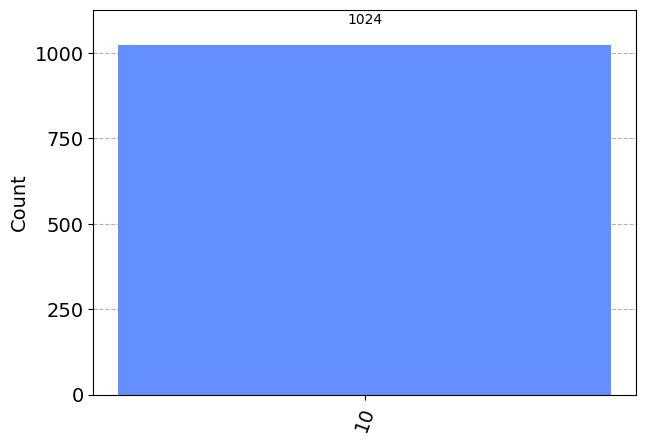

In [208]:
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts)